In [23]:
from collections import defaultdict, Counter
from workflow.gunc.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from workflow.external.gtdb_metadata import GtdbMetadataR207

In [24]:
DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [25]:
DF_MAX_CSS = AggregateMaxCssLevelMerged().output().read_cached()
print(DF_MAX_CSS.shape)
DF_MAX_CSS.head()

(35723, 13)


,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [26]:
DF = DF_META.merge(DF_MAX_CSS, left_index=True, right_index=True, how='left')
DF.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from workflow.gunc.aggregate_max_css_level_gunc import AggregateMaxCssLevelGtdbR95
from workflow.gunc.aggregate_max_css_level_progenomes import AggregateMaxCssLevelProGenomes


def get_df():
    df_pro = AggregateMaxCssLevelProGenomes().output().read_cached()
    df_gtdb = AggregateMaxCssLevelGtdbR95().output().read_cached()
    df_meta = GtdbMetadataR207().output().read_cached()

    df_merged = df_pro.merge(df_gtdb, how='inner', left_index=True, right_index=True, suffixes=('_pro', '_gtdb'))
    df_merged = df_merged.merge(df_meta, how='inner', left_index=True, right_index=True)
    return df_merged

DF = get_df()

In [28]:
DF

,n_genes_called_pro,n_genes_mapped_pro,n_contigs_pro,taxonomic_level_pro,proportion_genes_retained_in_major_clades_pro,genes_retained_index_pro,clade_separation_score_pro,contamination_portion_pro,n_effective_surplus_clades_pro,mean_hit_identity_pro,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,5745,5627,3,kingdom,1.0,0.98,0.0,0.0,0.0,0.97,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,2022,2016,1,kingdom,1.0,1.00,0.0,0.0,0.0,0.98,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,4831,4724,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.98,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,583,545,1,kingdom,1.0,0.93,0.0,0.0,0.0,0.98,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,646,643,2,kingdom,1.0,1.00,0.0,0.0,0.0,0.97,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_910664815.1,4908,4805,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.96,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli
GCF_910664825.1,4360,4327,1,kingdom,1.0,0.99,0.0,0.0,0.0,0.98,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli
GCF_910664845.1,5046,4937,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.96,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli


In [29]:
D_RANK = {'d': 'domain',
          'k': 'kingdom',
          'p': 'phylum',
          'c': 'class',
          'o': 'order',
          'f': 'family',
          'g': 'genus',
          's': 'species',
          'st': 'strain'}

In [30]:


def get_taxonomic_novelty(filter_pass=None):

    # Get the number of taxa contained within each rank
    d_tax_under = defaultdict(lambda: 0)
    for taxonomy in DF['gtdb_taxonomy'].values:
        for rank in taxonomy.split(';'):
            d_tax_under[rank] += 1

    # Find the novelty
    if filter_pass is not None:
        n_total = len(DF[DF['pass.GUNC'] == filter_pass])
    else:
        n_total = len(DF)

    # Process the rows
    tax_novelty = list()
    for gid, (tax_str, pass_gunc) in DF[['gtdb_taxonomy', 'pass.GUNC']].iterrows():
        if filter_pass is not None and pass_gunc != filter_pass:
            continue
        taxonomy = tax_str.split(';')
        last_rank = 'st'
        for taxon in reversed(taxonomy):
            taxon_count = d_tax_under[taxon]
            if taxon_count > 1:
                break
            last_rank = taxon[0]
        tax_novelty.append(D_RANK[last_rank])
    d_tax_novelty_count = Counter(tax_novelty)
    order = ('ph', 'cl', 'or', 'fa', 'ge', 'sp', 'st')
    d_tax_novelty_count = {k: v for k, v in sorted(d_tax_novelty_count.items(), key=lambda x: order.index(x[0][0:2]))}

    print(f'Highest taxonomic novelty (filtering on {filter_pass})')
    [print(f'\t{k} = {v:,}\t({v / n_total:.2%})') for k, v in d_tax_novelty_count.items()]
    print(f'\tTOTAL = {sum(d_tax_novelty_count.values()):,}')
    print(f'Number of pass.GUNC={filter_pass} ({n_total:,})')
    print()
    return d_tax_novelty_count

# d_novelty_all = get_taxonomic_novelty(filter_pass=None)
# d_novelty_fail = get_taxonomic_novelty(filter_pass=False)

In [31]:
def do_plot():

    x_label = 'Rank'
    y_label = '% of genomes in source'
    source_label = 'Origin'

    rows = list()
    for rank in D_RANK.values():
        cnt_gtdb = d_novelty_all.get(rank, 0)
        cnt_fail = d_novelty_fail.get(rank, 0)

        if cnt_fail == 0 and cnt_gtdb == 0:
            continue

        rows.append({
            x_label: rank,
            source_label: 'All GTDB R207',
            y_label: 100 * cnt_gtdb / 317542
        })
        rows.append({
            x_label: rank,
            source_label: 'Contaminated',
            y_label: 100 * cnt_fail / 35723
        })

    df = pd.DataFrame(rows)

    x_vals = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Strain']

    keys = ['phylum', 'class', 'order', 'family', 'genus', 'species', 'strain']
    y_all = [d_novelty_all.get(x, 0) for x in keys]
    y_fail = [d_novelty_fail.get(x, 0) for x in keys]

    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 22})

    fig, ax = plt.subplots(figsize=(15, 8))
    sns.barplot(data=df, x=x_label, y=y_label, hue=source_label,ax=ax)

    ax.set_ylim([0, 100])

    plt.title('Taxonomic novelty of genomes in GTDB R95')


    print(df)

# do_plot()

In [32]:


def get_taxonomic_novelty_v2(df):

    # Get the number of taxa contained within each rank
    d_tax_under = defaultdict(lambda: 0)
    for taxonomy in df['gtdb_taxonomy'].values:
        for rank in taxonomy.split(';'):
            d_tax_under[rank] += 1

    # Find the novelty
    n_total = len(df)

    # Process the rows
    tax_novelty = list()
    for gid, row in df.iterrows():
        tax_str = row['gtdb_taxonomy']
        taxonomy = tax_str.split(';')
        last_rank = 'st'
        for taxon in reversed(taxonomy):
            taxon_count = d_tax_under[taxon]
            if taxon_count > 1:
                break
            last_rank = taxon[0]
        tax_novelty.append(D_RANK[last_rank])
    d_tax_novelty_count = Counter(tax_novelty)
    order = ('ph', 'cl', 'or', 'fa', 'ge', 'sp', 'st')
    d_tax_novelty_count = {k: v for k, v in sorted(d_tax_novelty_count.items(), key=lambda x: order.index(x[0][0:2]))}

    print(f'Highest taxonomic novelty')
    [print(f'\t{k} = {v:,}\t({v / n_total:.2%})') for k, v in d_tax_novelty_count.items()]
    print(f'\tTOTAL = {sum(d_tax_novelty_count.values()):,}')
    print()
    return d_tax_novelty_count
get_taxonomic_novelty_v2(DF)

Highest taxonomic novelty
	phylum = 20	(0.01%)
	class = 47	(0.01%)
	order = 263	(0.08%)
	family = 814	(0.26%)
	genus = 5,977	(1.88%)
	species = 36,047	(11.35%)
	strain = 274,374	(86.41%)
	TOTAL = 317,542



{'phylum': 20,
 'class': 47,
 'order': 263,
 'family': 814,
 'genus': 5977,
 'species': 36047,
 'strain': 274374}

In [33]:
def plot_taxonomic_novelty_for_dfs_v2():
    print('Calculating for ALL')
    d_novelty_all = get_taxonomic_novelty_v2(DF)
    #
    print('Calculating for FAIL (union)')
    d_novelty_fail_union = get_taxonomic_novelty_v2(DF[(DF['pass.GUNC_pro'] == False) | (DF['pass.GUNC_gtdb'] == False)])
    #
    print('Calculating for FAIL (int)')
    d_novelty_fail_int = get_taxonomic_novelty_v2(DF[(DF['pass.GUNC_pro'] == False) & (DF['pass.GUNC_gtdb'] == False)])


    print('Calculating for FAIL (ProGenomes)')
    d_novelty_fail_pro = get_taxonomic_novelty_v2(DF[DF['pass.GUNC_pro'] == False])

    print('Calculating for FAIL (R95)')
    d_novelty_fail_r95 = get_taxonomic_novelty_v2(DF[DF['pass.GUNC_gtdb'] == False])

    dicts = [
        ('all', d_novelty_all),
        ('union', d_novelty_fail_union),
        ('int', d_novelty_fail_int),
        ('pro', d_novelty_fail_pro),
        ('r95', d_novelty_fail_r95),
    ]

    rows = list()
    for k, d in dicts:
        cur_denom = sum(d.values())
        for rank, cnt in d.items():
            rows.append({
                'source': k,
                'rank': rank,
                'count': cnt,
                'pct': 100 * (cnt / cur_denom)
            })

    df = pd.DataFrame(rows)

    print()
    return df
#
DF_TAX_NOVELTY = plot_taxonomic_novelty_for_dfs_v2()

Calculating for ALL
Highest taxonomic novelty
	phylum = 20	(0.01%)
	class = 47	(0.01%)
	order = 263	(0.08%)
	family = 814	(0.26%)
	genus = 5,977	(1.88%)
	species = 36,047	(11.35%)
	strain = 274,374	(86.41%)
	TOTAL = 317,542

Calculating for FAIL (union)
Highest taxonomic novelty
	phylum = 18	(0.05%)
	class = 49	(0.14%)
	order = 136	(0.38%)
	family = 356	(1.00%)
	genus = 1,723	(4.82%)
	species = 4,993	(13.98%)
	strain = 28,448	(79.63%)
	TOTAL = 35,723

Calculating for FAIL (int)
Highest taxonomic novelty
	phylum = 10	(0.10%)
	class = 31	(0.30%)
	order = 89	(0.85%)
	family = 168	(1.61%)
	genus = 734	(7.05%)
	species = 1,510	(14.50%)
	strain = 7,871	(75.59%)
	TOTAL = 10,413

Calculating for FAIL (ProGenomes)
Highest taxonomic novelty
	phylum = 11	(0.06%)
	class = 35	(0.20%)
	order = 100	(0.58%)
	family = 204	(1.18%)
	genus = 1,026	(5.94%)
	species = 2,575	(14.90%)
	strain = 13,327	(77.13%)
	TOTAL = 17,278

Calculating for FAIL (R95)
Highest taxonomic novelty
	phylum = 19	(0.07%)
	class = 

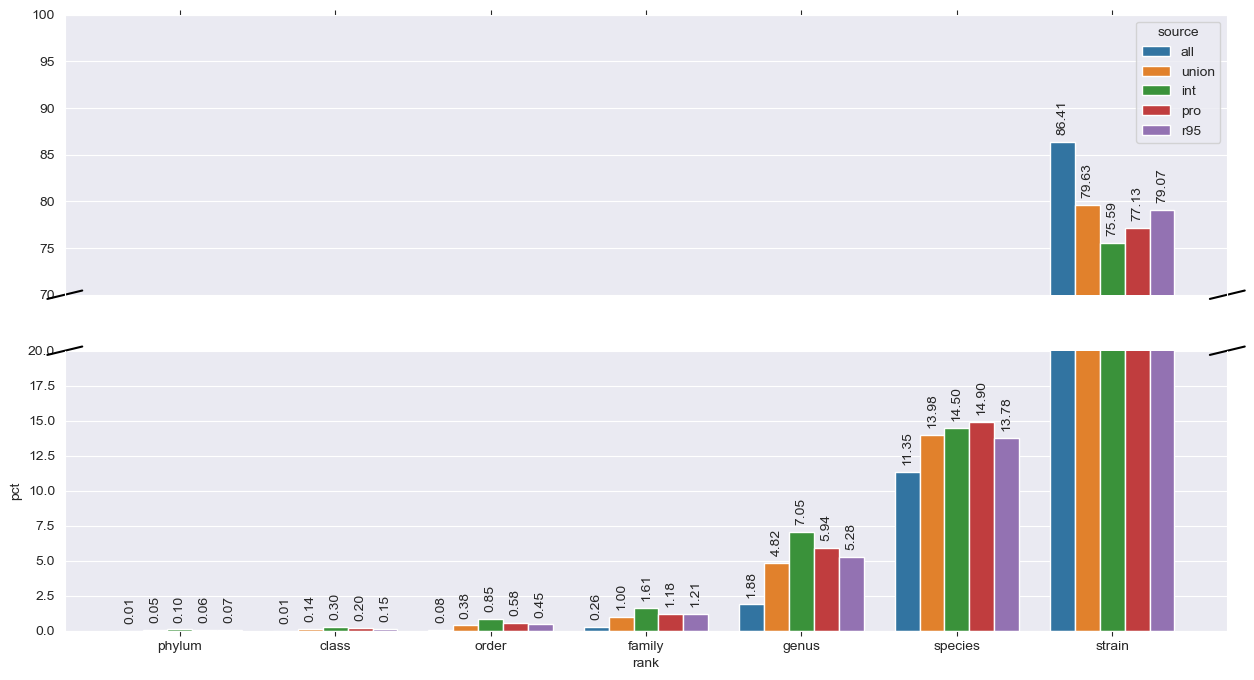

In [34]:
def plot_tax_novelty():

    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

    sns.barplot(x="rank", y="pct", data=DF_TAX_NOVELTY, hue='source', ax=ax1)
    sns.barplot(x="rank", y="pct", data=DF_TAX_NOVELTY, hue='source', ax=ax2)

    ax1.set_ylim(70, 100)
    ax2.set_ylim(0, 20)

    # hide the spines between ax and ax2
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    ax2.get_legend().remove()

    ax1.set_xlabel('')
    ax1.set_ylabel('')

    # plt.yscale('log')

    for i in ax1.containers:
        ax1.bar_label(i, fmt='%.2f', rotation='vertical', padding=5)

    for i in ax2.containers:
        ax2.bar_label(i, fmt='%.2f', rotation='vertical', padding=5)

    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty()


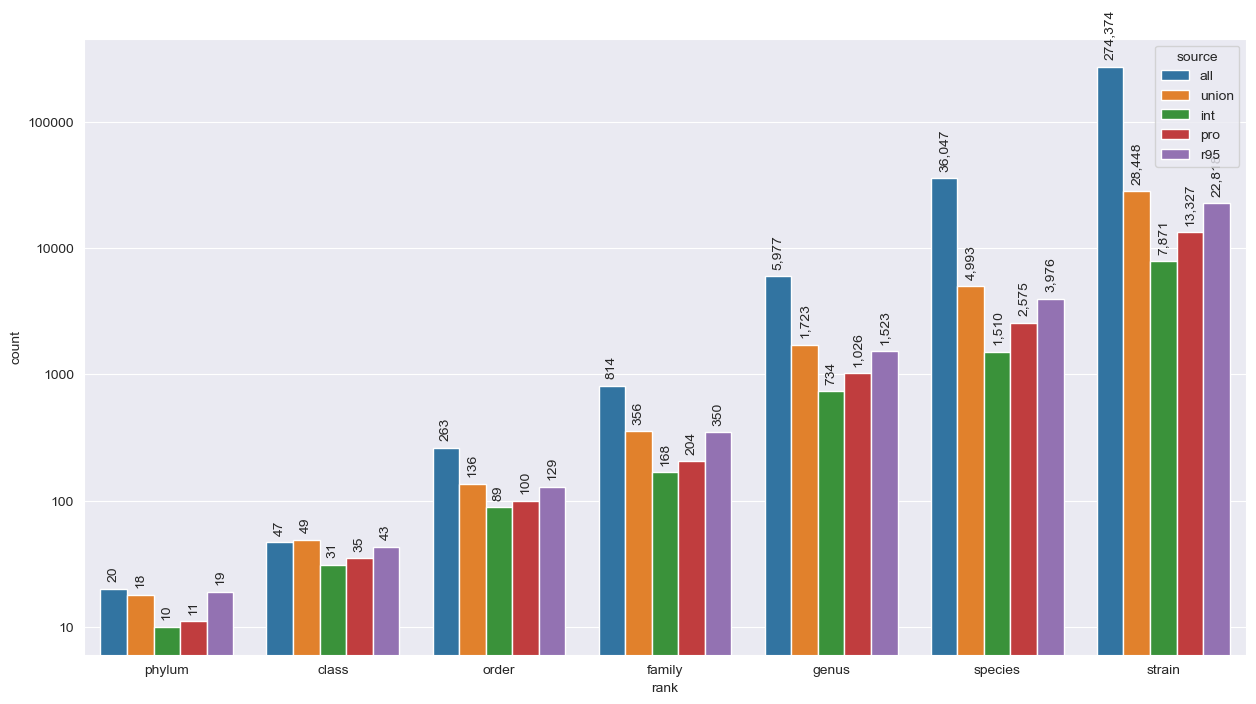

In [35]:
def plot_tax_novelty_log():

    f, ax = plt.subplots(1, 1, figsize=(15, 8))

    sns.barplot(x="rank", y="count", data=DF_TAX_NOVELTY, hue='source', ax=ax)

    # ax.set_ylim(0, 10e10)

    plt.yscale('log')
    from matplotlib.ticker import StrMethodFormatter, NullFormatter
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_minor_formatter(NullFormatter())

    for i in ax.containers:
        ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues], rotation='vertical', padding=5)
        # ax.bar_label(i, fmt='%g', rotation='vertical', padding=5)

    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty_log()
